In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
power_data = pd.read_excel( "Folds5x2_pp.xlsx" , sheet_name='Sheet1')

In [3]:
type(power_data)

pandas.core.frame.DataFrame

In [4]:
power_data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
power_data.iloc[:,4]

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

### (b)  i:

- 1. there are 9568 rows   
- 2. there are 5 columns  
- 3. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.


###  (b)  ii.
<p>
Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
yourfindings
</p>

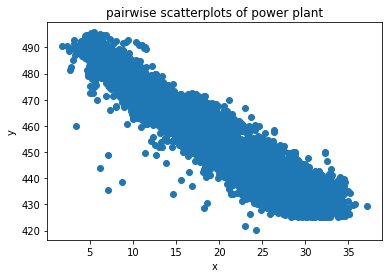

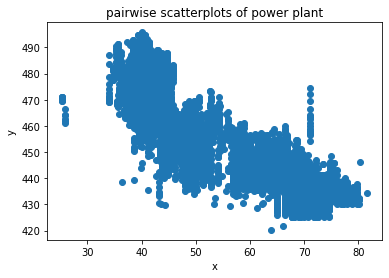

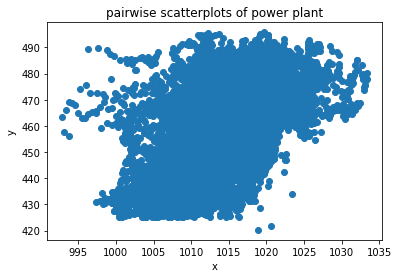

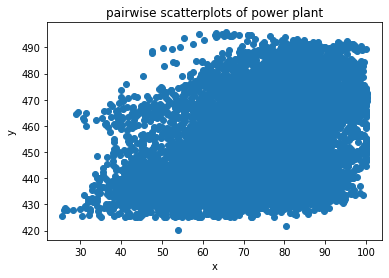

In [6]:
for i in range(0,4):
    x = power_data.iloc[:,i]
    y = power_data.iloc[:,-1]
    #print (x)
    #print(y)
    plt.scatter(x, y )
    plt.title('pairwise scatterplots of power plant')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

<div style="color:navy"> ANS : </div>

- For PE and AT : when AT is bigger PE will be small. The coefficient is -1
- For PE and V  : when V is bigger PE will be small. The coefficient is bigger than PE to AT. -0.X
- For PE and AP : when AP is bigger PE increases value. The coefficient is positive.
- For PE and RH : when RH is bigger PE increases value. The  correlation is not obvious.


In [7]:
np_power_data = power_data.to_numpy()

In [8]:
print ( np.percentile(np_power_data, 25)  ) # first  quartiles
print ( np.percentile(np_power_data, 50)  ) # median
print ( np.percentile(np_power_data, 75)  ) # third quartiles
print ( np.amax(np_power_data[:,0]) - np.amin(np_power_data[:,0]) )

41.46
75.6
468.43
35.3


In [9]:
np_table = np.arange(20).reshape(4,5) 
for i in range(0,5): 
    np_tmp = np_power_data[:,i]
    # first  quartiles
    np_table[0:1,i] = (np.percentile(np_tmp, 25))  
    # median
    np_table[1:2, i] = (np.percentile(np_tmp, 50)) 
    # third quartiles
    np_table[2:3, i] = (np.percentile(np_tmp, 75))  
    # range
    np_table[3:4, i] = (np.amax(np_tmp) - np.amin(np_tmp) ) 
    

In [10]:
np_tab = [[] for _ in range(5)]
for i in range(0,5): 
    np_tmp = np_power_data[:,i]
      
    # median
    np_tab[i].append(np.percentile(np_tmp, 50)) 
    # range
    np_tab[i].append(np.amax(np_tmp) - np.amin(np_tmp) ) 
    # first  quartiles
    np_tab[i].append(np.percentile(np_tmp, 25))
    # third quartiles
    np_tab[i].append(np.percentile(np_tmp, 75))  
    # interquartile range
    np_tab[i].append(np.percentile(np_tmp, 75) - np.percentile(np_tmp, 25))  
    
    

### (b) iii.
What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table

In [11]:
table_vals = [np_tab[0],np_tab[1],np_tab[2],np_tab[3],np_tab[4]]
row_labels = ['AT', 'V', 'AP', 'RH', 'PE']
col_labels = ['median','range','first quartiles','third quartiles','interquartile range']
pd.DataFrame(table_vals,columns = col_labels, index = row_labels)

,median,range,first quartiles,third quartiles,interquartile range
AT,20.345,35.30,13.5100,25.72,12.2100
V,52.080,56.20,41.7400,66.54,24.8000
AP,1012.940,40.41,1009.1000,1017.26,8.1600
RH,74.975,74.60,63.3275,84.83,21.5025
PE,451.550,75.50,439.7500,468.43,28.6800


###  (c) .
<p>
For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?
</p>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

7654
7654
1914
1914


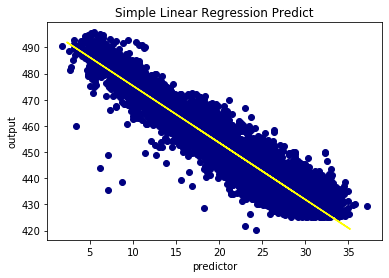

7654
7654
1914
1914


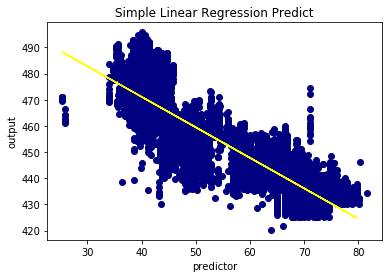

7654
7654
1914
1914


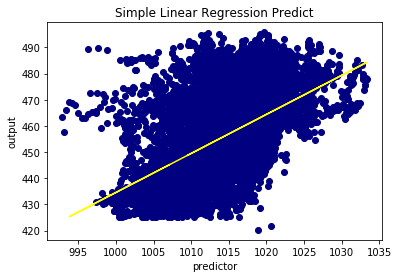

7654
7654
1914
1914


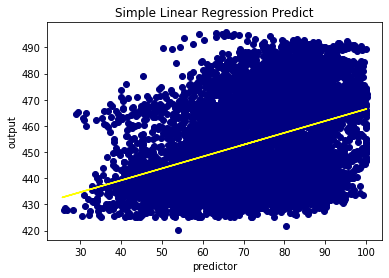

In [13]:
simp_linear = list()
for i in range(0,4):
    #x = np_power_data[:,i].reshape(1,-1)
    #y = np_power_data[:,-1].reshape(1,-1)
    x = np_power_data[:,i]
    y = np_power_data[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    x_train = x_train.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    print(len(x_train))
    print(len(y_train))
    print(len(x_test))
    print(len(y_test))
    model = LinearRegression().fit(x_train, y_train)
    
    model.score(x_test, y_test)
    simp_linear.append(model.coef_[0][0])
    y_pred = model.predict(x_test) 
    plt.scatter(x_train, y_train, color = 'navy')
    plt.plot(x_test, y_pred, color = 'yellow')
    plt.title('Simple Linear Regression Predict')
    plt.xlabel('predictor')
    plt.ylabel('output')
    plt.show()

In [14]:
print(simp_linear)

[-2.1726024841820393, -1.1650690556881318, 1.4923230085641146, 0.45318039872621296]


In [15]:
model.coef_[0][0]

0.45318039872621296

In [16]:
print(simp_linear)

[-2.1726024841820393, -1.1650690556881318, 1.4923230085641146, 0.45318039872621296]


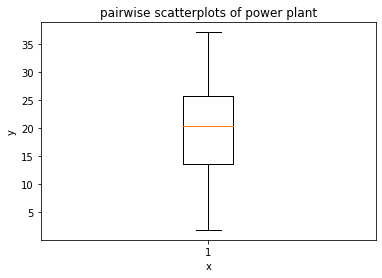

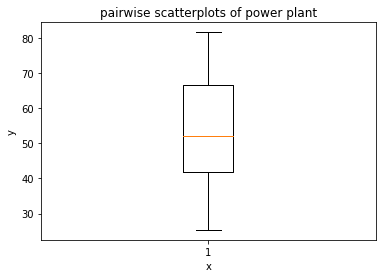

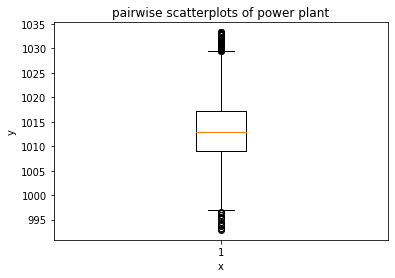

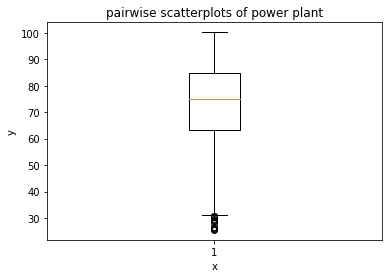

In [17]:
for i in range(0,4):
    x = power_data.iloc[:,i]
    #y = power_data.iloc[:,-1]
    plt.boxplot(x)
    plt.title('pairwise scatterplots of power plant')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### (d) 
Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0?

In [18]:
x = power_data[['AT', 'V', 'AP','RH']]
y = power_data['PE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#x_train = x_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
#x_test = x_test.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

model = LinearRegression().fit(x_train, y_train)

r_sq = model.score(x_test, y_test)
y_pred = model.predict(x_test) 
#plt.scatter(x_train, y_train, color = 'navy')

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)



    Coefficient
AT    -1.973131
V     -0.236500
AP     0.063879
RH    -0.158070
      Actual   Predicted
4834  431.23  431.427616
1768  460.01  458.561246
2819  461.14  462.752647
7779  445.90  448.595962
7065  451.29  457.870777
...      ...         ...
6452  460.29  463.634916
794   452.42  457.035484
627   473.26  469.518359
3515  438.00  442.417595
7600  463.28  461.882799

[1914 rows x 2 columns]


In [19]:
multi_linear = model.coef_

In [20]:
x_train = sm.add_constant(x_train)
#y = data.target

# Fit the logistic regression
est = sm.OLS(y_train, x_train)
res = est.fit()
predict = res.predict(x_train)
print(res.params)
print(res.summary())

const    452.841037
AT        -1.973131
V         -0.236500
AP         0.063879
RH        -0.158070
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.455e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:02:42   Log-Likelihood:                -22517.
No. Observations:                7654   AIC:                         4.504e+04
Df Residuals:                    7649   BIC:                         4.508e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
#simp_linear = simp_linear *3
print (simp_linear)
print(multi_linear)

[-2.1726024841820393, -1.1650690556881318, 1.4923230085641146, 0.45318039872621296]
[-1.97313099 -0.23649993  0.06387891 -0.15807019]


### (e)
How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis

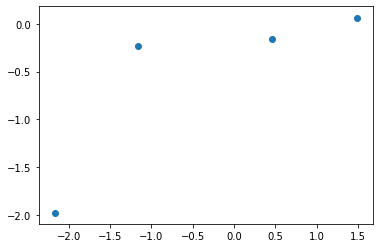

In [22]:
plt.scatter(simp_linear, multi_linear)
plt.show()

### ( f )
Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor
X, fit a model of the form 1

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [24]:
power_data.columns[0]

'AT'

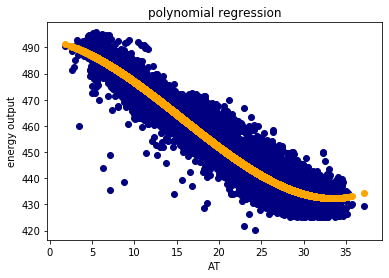

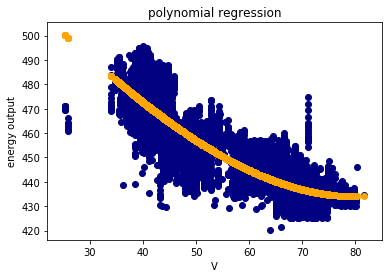

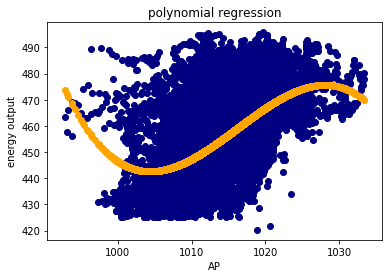

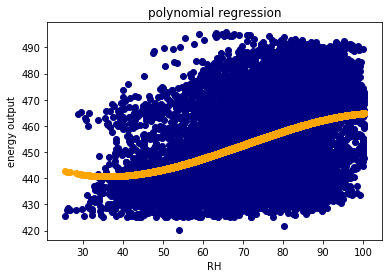

In [26]:
for i in range (0, 4):
    x_f = power_data.iloc[:,i]
    y_f = power_data.iloc[:,-1]
    x_f = x_f.values.reshape(-1,1)
    y_f = y_f.values.reshape(-1,1)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x_f)
    poly.fit(x_poly, y_f)
    poly_reg = LinearRegression().fit(x_poly, y_f)
    y_pred = poly_reg.predict(poly.fit_transform(x_f))
    plt.scatter(x_f, y_f, color = 'navy')
    plt.scatter(x_f ,y_pred , color = 'orange')
    plt.title('polynomial regression')
    plt.xlabel(power_data.columns[i])
    plt.ylabel('energy output')
    plt.show()

### ( g )
Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [27]:

#col_nam1 = power_data.columns[0]
#col_nam2 = power_data.columns[]
X_data =power_data.loc[:,['AT','V']] 
y = power_data.iloc[:,-1]
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X_data)
#regr = LinearRegression()

#model = regr.fit(X_inter, y)

x_train = sm.add_constant(X_inter)
#y = data.target

# Fit the logistic regression
est = sm.OLS(y, x_train)
res = est.fit()
predict = res.predict(x_train)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 3.946e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:02:48   Log-Likelihood:                -28315.
No. Observations:                9568   AIC:                         5.664e+04
Df Residuals:                    9564   BIC:                         5.667e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        530.5331      0.753    704.391      0.0

In [28]:
power_data.loc[:,power_data.columns[0]] * power_data.loc[:,power_data.columns[1]]

0        624.7296
1       1585.3328
2        201.3340
3       1195.6952
4        405.7500
          ...    
9563     827.3385
9564     516.7842
9565    2328.0156
9566    1700.1360
9567    1350.4320
Length: 9568, dtype: float64

###  select two features and add interaction term

In [29]:

for i in range(0,4):
    for j in range(0,4):
        if i != j and j>i:
            X_data =  power_data.loc[:,power_data.columns[i]] * power_data.loc[:,power_data.columns[j]]
            print(X_data)
            y = power_data.iloc[:,-1]
            x_train = sm.add_constant(X_data)
            est = sm.OLS(y, x_train)
            res = est.fit()
            predict = res.predict(x_train)
            print(res.summary())
            

0        624.7296
1       1585.3328
2        201.3340
3       1195.6952
4        405.7500
          ...    
9563     827.3385
9564     516.7842
9565    2328.0156
9566    1700.1360
9567    1350.4320
Length: 9568, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 6.581e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:02:50   Log-Likelihood:                -30846.
No. Observations:                9568   AIC:                         6.170e+04
Df Residuals:                    9566   BIC:                         6.171e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                         

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [83]:
g_data = []
for i in range(0,4):
    g_data.append(power_data[power_data.columns[i]])
for i in range(0,4):
    for j in range(0,4):
        if i != j and j>i:
            g_data.append(g_1[i]*g_1[j])
g_data = np.array(g_data).T
z = np.array(power_data.iloc[:,4])
x = sm.add_constant(g_data)
model = sm.OLS(z,x)
asd = model.fit()
print(asd.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:36:05   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

<div style = "color:navy" >
P-Value less than 0.05 in interaction terms: 
    AT&V, AT&RH, V&AP, AP&RH 
</div>

### ( h )
Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs

In [107]:
h_data = []
for i in range(0,4):
    h_data.append(power_data[power_data.columns[i]])
    
for i in range(0,4):
    for j in range(0,4):
        if i != j and j>i:
            h_data.append(h_data[i]*h_data[j])
for i in range(0,4):
    h_data.append(h_data[i]*h_data[i])
h_data = np.array(h_data).T
y = power_data.iloc[:,-1]
y = y.to_numpy()
#print(h_data)
#print(y)
x_train, x_test, y_train, y_test = train_test_split(h_data, y, test_size=0.3, random_state = 70)

model = LinearRegression().fit(x_train, y_train)
r_sq = model.score(x_test, y_test)
y_pred_test = model.predict(x_test) 
y_pred_train = model.predict(x_train)

x_train = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train)
res = est.fit()
print(res.summary())
train_MSE = sum( (y_pred_train - y_train) ** 2 ) / len(y_train)
test_MSE = sum(  (y_pred_test - y_test) **2  ) / len(y_test)
print("\n")
print(" Train MSE is : " + str(train_MSE) )
print(" Test MSE is : " + str(test_MSE) )




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7197.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:34:13   Log-Likelihood:                -19173.
No. Observations:                6697   AIC:                         3.838e+04
Df Residuals:                    6682   BIC:                         3.848e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7432.0753   1412.101     -5.263      0.0

In [108]:
remove = []
print("p value > 0.05")
h_len = len(res.pvalues)
for i in range(4,h_len):
    if res.pvalues[i] > 0.05:
        print ( str(i) + "  " + str (res.pvalues[i] ) )
        remove.append(i)

p value > 0.05
6  0.21629324042068965
8  0.30453795516621546
9  0.8464559561839943
12  0.8807941637564868


In [109]:
after_remove = []
h_data_2 = []
for i in range(0,4):
    h_data_2.append(power_data[power_data.columns[i]])
    
for i in range(0,4):
    for j in range(0,4):
        if i != j and j>i:
            h_data_2.append(h_data_2[i]*h_data_2[j])
for i in range(0,4):
    h_data_2.append(h_data_2[i]*h_data_2[i])
    
for i in range(0,len(h_data_2)):
    if i not in remove:
        after_remove.append(h_data_2[i])
        
            
print(after_remove)

[0       14.96
1       25.18
2        5.11
3       20.86
4       10.82
        ...  
9563    16.65
9564    13.19
9565    31.32
9566    24.48
9567    21.60
Name: AT, Length: 9568, dtype: float64, 0       41.76
1       62.96
2       39.40
3       57.32
4       37.50
        ...  
9563    49.69
9564    39.18
9565    74.33
9566    69.45
9567    62.52
Name: V, Length: 9568, dtype: float64, 0       1024.07
1       1020.04
2       1012.16
3       1010.24
4       1009.23
         ...   
9563    1014.01
9564    1023.67
9565    1012.92
9566    1013.86
9567    1017.23
Name: AP, Length: 9568, dtype: float64, 0       73.17
1       59.08
2       92.14
3       76.64
4       96.62
        ...  
9563    91.00
9564    66.78
9565    36.48
9566    62.39
9567    67.87
Name: RH, Length: 9568, dtype: float64, 0        624.7296
1       1585.3328
2        201.3340
3       1195.6952
4        405.7500
          ...    
9563     827.3385
9564     516.7842
9565    2328.0156
9566    1700.1360
9567    1350.4320
Leng

In [110]:
h_data = np.array(after_remove).T
y = power_data.iloc[:,-1]
y = y.to_numpy()
#print(h_data)
#print(y)
x_train, x_test, y_train, y_test = train_test_split(h_data, y, test_size=0.3, random_state = 70)

model = LinearRegression().fit(x_train, y_train)
r_sq = model.score(x_test, y_test)
y_pred_test = model.predict(x_test) 
y_pred_train = model.predict(x_train)

x_train = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train)
res = est.fit()
print(res.summary())
train_MSE = sum( (y_pred_train - y_train) ** 2 ) / len(y_train)
test_MSE = sum(  (y_pred_test - y_test) **2  ) / len(y_test)
print("\n")
print(" Train MSE is : " + str(train_MSE) )
print(" Test MSE is : " + str(test_MSE) )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9997.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:34:26   Log-Likelihood:                -19199.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6686   BIC:                         3.850e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        737.1402     51.218     14.392      0.0

### (i)
Perform
k
-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of
k ∈ {1, 2, . . . , 100}
that gives you the
best fit. Plot the train and test errors in terms of 1/k

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [112]:
i_data = []
y = power_data.iloc[:,-1]
y = np.array(y, dtype=int)
#y = y.reshape(-1,1)
for i in range(0,4):
    i_data.append(power_data[power_data.columns[i]])
i_data = np.array(i_data,dtype=int).transpose()

print(i_data)
print(y)
x_train, x_test, y_train, y_test = train_test_split(i_data, y, test_size=0.3, random_state = 70)
print(x_train)
print(y_train)
#print(len(x_train))
#print(len(y_train))

[[  14   41 1024   73]
 [  25   62 1020   59]
 [   5   39 1012   92]
 ...
 [  31   74 1012   36]
 [  24   69 1013   62]
 [  21   62 1017   67]]
[463 444 488 ... 429 435 453]
[[  17   40 1011   61]
 [  29   68 1011   59]
 [  23   59 1019   59]
 ...
 [  20   62 1011   89]
 [   7   42 1008   83]
 [  30   71 1000   65]]
[462 438 441 ... 443 483 431]


In [114]:
from sklearn.neighbors import KNeighborsRegressor
error_numbers_test = 20000
error_numbers_train = 20000
test_error = []
train_error = []
error_sum_test = 0
error_sum_train = 0
best_k = 0
k = []
for i in range(1,100):
    # 1/k
    k.append(1/i)
    # fit knn regressor model
    
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    
    # train error
    knn_tmp = knn.predict(x_train)
    
    y_train_predict = knn.predict(x_train)
    
    train_MSE = sum( ( y_train_predict - y_train) ** 2 ) / len(y_train)
    train_error.append( train_MSE )
    
    if train_MSE < error_numbers_train:
        #best_k = i
        error_numbers_train = train_MSE
    # test error
    

    
    y_test_predict = knn.predict(x_test)
    
    test_MSE = sum(  ( y_test_predict - y_test) **2  ) / len(y_test)  
    
    test_error.append( test_MSE  )
    
    if test_MSE < error_numbers_test:
        best_k = i
        error_numbers_test = test_MSE
    
      
print(best_k)
print(test_error)
print(train_error)
#print(len(train_error))

5
[22.97944966910484, 19.5350052246604, 18.285692170749854, 17.509360849878092, 17.152420759317323, 17.279025891094985, 17.562024182713827, 17.652097483455243, 17.665712037359597, 17.828634622082863, 17.961654159146335, 18.117281531793214, 18.226348364279353, 18.335613346697066, 18.472267502612297, 18.611643101271333, 18.70719243502921, 18.791646778556164, 18.866524640810596, 18.93809561128526, 19.109446170201586, 19.044979576327535, 19.122625775386254, 19.186082568985043, 19.314680599094437, 19.349168588558456, 19.413385068699355, 19.47467461383711, 19.606114861352943, 19.651120786408192, 19.82240576492254, 19.888912018895855, 19.972614911343925, 20.068999866219748, 20.1005944028604, 20.148378742727456, 20.19697567600636, 20.24306345526133, 20.285326684973043, 20.327405738418697, 20.405293162190695, 20.427443367919476, 20.50988616513316, 20.501455492514207, 20.587983023078824, 20.67479567199274, 20.721057376026845, 20.805254563112182, 20.8769385390477, 20.951034204110073, 21.013196971

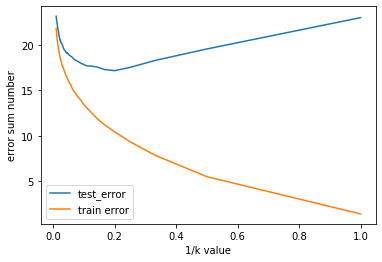

In [35]:
plt.xlabel('1/k value')
plt.ylabel('error sum number')
plt.plot(k,test_error, label='test_error')
plt.plot(k,train_error, label = 'train error')
#plt.gca().invert_xaxis()
plt.legend()

In [38]:
power_np = power_data.to_numpy()
power_np[:,1]

array([41.76, 62.96, 39.4 , ..., 74.33, 69.45, 62.52])

In [66]:
i_data = []
y = power_data.iloc[:,-1]
y = np.array(y, dtype=int)
#y = y.to_numpy()
for i in range(0,5):
    i_tmp =  ( power_np[:,i] - np.mean(power_np[:,i]) ) / np.std(power_np[:,i])
    i_data.append(i_tmp)
i_data = np.array(i_data)
#i_data = np.array(i_data).transpose()

#print(y)
x_train, x_test, y_train, y_test = train_test_split(i_data[:4,:].T, y, test_size=0.3, random_state = 100)
#print(x_train)
#print(y_train)



In [54]:
from sklearn.neighbors import KNeighborsRegressor
error_numbers_test = 200
error_numbers_train = 200
test_error = []
train_error = []
error_sum_test = 0
error_sum_train = 0
best_k = 0
k = []
for i in range(1,100):
    # 1/k
    k.append(1/i)
    # fit knn regressor model
    
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train.astype('int'))
    
    # train error
    knn_tmp = knn.predict(x_train)
    
    y_train_predict = knn.predict(x_train)
    
    train_MSE = sum( ( y_train_predict - y_train) ** 2 ) / len(y_train)
    train_error.append( train_MSE )
    
    if train_MSE < error_numbers_train:
        #best_k = i
        error_numbers_train = train_MSE
    # test error

    y_test_predict = knn.predict(x_test)
    
    test_MSE = sum(  ( y_test_predict - y_test) **2  ) / len(y_test)  
    
    test_error.append( test_MSE  )
    
    if test_MSE < error_numbers_test:
        best_k = i
        error_numbers_test = test_MSE
    
      
print(best_k)
print(test_error)
print(train_error)
#print(len(train_error))

3
[20.553117380703586, 17.04440961337513, 16.275397654708133, 16.31328369905956, 16.284444444444407, 16.45697395410054, 16.394415655499397, 16.490568399512366, 16.74082244324909, 16.71380703587596, 16.921247240141454, 17.00377820349101, 17.16874931729047, 17.26717562678155, 17.329669104841507, 17.366139846743295, 17.517408905906702, 17.593819205249662, 17.663484592799655, 17.83157349355621, 17.89878533556696, 18.009650509080583, 18.115278329214735, 18.2260602916136, 18.358000417972868, 18.39431604352026, 18.439574306042335, 18.4991438843039, 18.523710183966944, 18.583514454893802, 18.6821007085459, 18.72822615976576, 18.77881151529869, 18.811294245401136, 18.836112852664566, 18.91894546787593, 19.00350854964084, 19.08512530018882, 19.131550147465273, 19.18462817833503, 19.264286384740135, 19.318959988500268, 19.380476592259363, 19.439837603737608, 19.494783337848457, 19.529430772097474, 19.572103545878463, 19.59334892870289, 19.631084430018788, 19.677605712295406, 19.67900739085564, 19

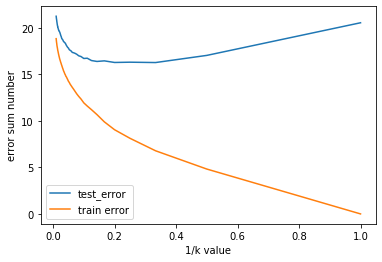

In [55]:
plt.xlabel('1/k value')
plt.ylabel('error sum number')
plt.plot(k,test_error, label='test_error')
plt.plot(k,train_error, label = 'train error')
plt.legend()

### ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.


(a) The sample size n is extremely large, and the number of predictors p is small.

<div style ="color:navy">
Flexible methods work better when we have a large n sample size, and also greatly reduces the risk of overfitting. 
</div>


(b) The number of predictors p is extremely large, and the number
of observations n is small.

<div style ="color:navy">
Inflexible method should be choosed because flexible model will overfit with a small number of observations.
</div>

(c) The relationship between the predictors and response is highly
non-linear.
<div style="color:navy">
flexible methods fits better to non-linear and has less bias.
</div>

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely
high.
<div style = "color:navy">
We should choose inflexible method to avoid overfitting because high variance varies a lot.
</div>

### ISLR: 2.4.7
The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0

The Euclidean distance between points p and q is the lenght of the line segment connecting them pq¯.
<div style = "color:navy">
    formula:
    dist((x, y), (a, b)) =  sqrt ( (x - a)² + (y - b)² )
    
</div>

In [77]:
six_point = [[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]
print(six_point[0])

[0, 3, 0]


In [79]:
import math
for i in range( 0, len(six_point) ):
    tmp = math.sqrt( (0-six_point[i][0])**2 + (0-six_point[i][1])**2 + (0-six_point[i][2])**2  )
    print ( str(i+1) + "th point " + str (tmp) )

1th point 3.0
2th point 2.0
3th point 3.1622776601683795
4th point 2.23606797749979
5th point 1.4142135623730951
6th point 1.7320508075688772


(b) What is our prediction with K = 1? Why?
<div style="color:navy">
    The nearest neighbor to test point (0, 0, 0) , nearest point is [-1,0,1]       
</div>

(c) What is our prediction with K = 3? Why?
<div style = "color:navy">
while k = 3, the nearest point are [-1, 0, 1], [1, 1, 1], [2, 0, 0]. Red are more than green, so we predict Red

</div>

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for
K to be large or small? Why?
<div style = "color:navy">
The best value for K would be small because it is easy to fit in data with few K values. 
</div>